# Simple Linear Regression

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## reading the dataset

In [2]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


## EDA , Feature Engineering

plt.scatter(x=df['Weight'],y=df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [4]:
df.isna().sum()

Weight    0
Height    0
dtype: int64

In [5]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


## Divide our dataset into independent and dependent feature

In [6]:
X = df[['Weight']] # Data should be 2d array for model training, independent feature
y = df['Height']  # denpendent feature

In [7]:
X.shape,y.shape

((23, 1), (23,))

## Further divide dataset into train and test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [10]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [11]:
y_train.shape,y_test.shape

((18,), (5,))

## Standard Scaling on the train and test data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test) ## because we want to transformation through train data fitting

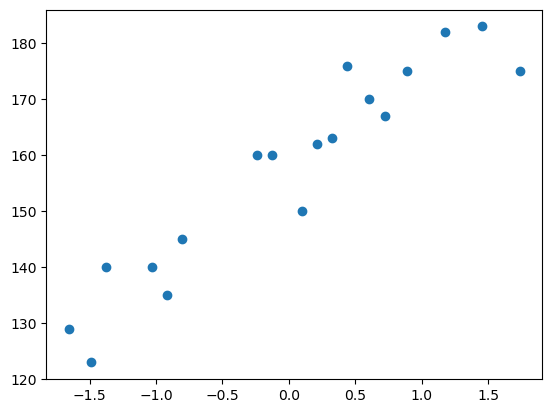

In [16]:
plt.scatter(X_train,y_train)

## model Traning

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regressor  = LinearRegression()

In [19]:
## training the train data

regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
regressor.intercept_

157.5

In [21]:
regressor.coef_

array([17.03440872])

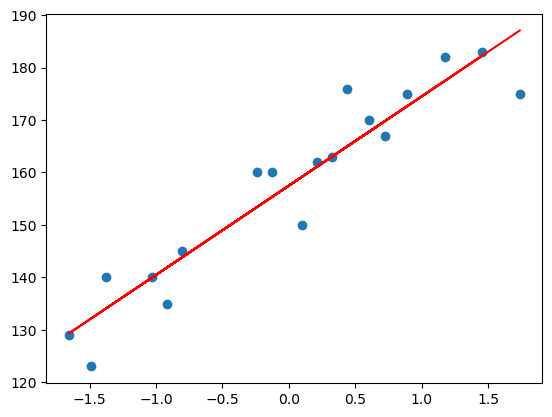

In [22]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### prediction of train data
- predicted height output = intercept + coef_(Weights)
- y_pred_train = 157.5 + 17.03(X_train)

### prediction of test data
- predicted height output = intercept + coef_(weights)
- y_pred_test = 157.5 + 17.03(X_test)

## Prediction for test data

In [23]:
y_pred_test = regressor.predict(X_test)
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [24]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

## Performance Metrics

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [26]:
## error or cost function

mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
mse,mae,rmse

(109.77592599051664, 9.822657814519232, 10.477400726827081)

## Accuracy of the model R squared and Adjusted R Squared

**Formula - R^2 = 1- SSR/SST**

    - R^2 = coefficient or slope
    - SSR = Sum of squares of residuals
    - SST = Total sum of squares

In [27]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
score

0.776986986042344

**Adjusted R^2 = 1-[(1-r^2)*(n-1)/(n-k-11)]**

    - r^2 = accuracy of model
    - n = The number of observation
    - k = the number of predictor variable

In [28]:
1-(1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)

0.7026493147231252

# Multiple Linear Regression

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
from sklearn.datasets import fetch_california_housing

In [31]:
california = fetch_california_housing()

In [32]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [33]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [34]:
california.data.shape

(20640, 8)

In [35]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [36]:
## Lets prepare the data

dataset = pd.DataFrame(california.data, columns=california.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [37]:
dataset['Price'] = california.target

In [38]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [40]:
# checking the missing values

dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

<AxesSubplot: >

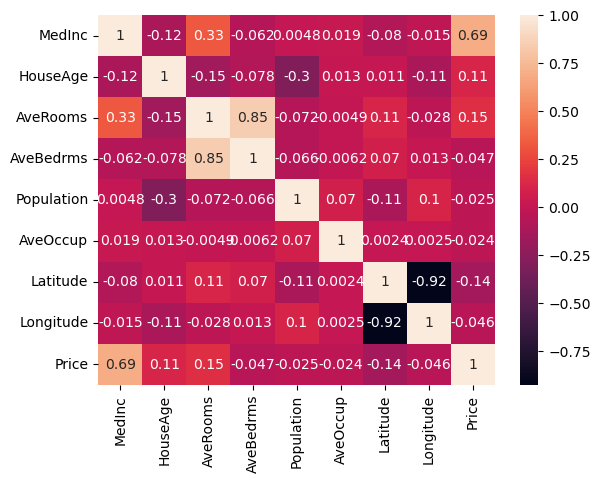

In [41]:
# checking the correlation 

sns.heatmap(dataset.corr(),annot=True)

In [42]:
# dividing the dataset in dependent and independent features

X = dataset.iloc[:,:-1]   # independent features
y = dataset.iloc[:,-1]  # dependent features

In [43]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [44]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [45]:
# Train test data splitting

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [46]:
X_train.shape, X_test.shape

((13828, 8), (6812, 8))

In [47]:
y_train.shape, y_test.shape

((13828,), (6812,))

### Scaling all the features

In [48]:
# standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
X_train_scaled

array([[-0.72986836,  1.22081889, -0.70305988, ...,  0.05861244,
         0.96929441, -1.43979718],
       [-0.61046678, -0.28439808,  0.07828001, ...,  0.13015917,
        -0.75823526,  1.08204942],
       [ 0.00784578, -0.60128586, -0.2447376 , ..., -0.09793279,
         0.94594941, -1.2454256 ],
       ...,
       [ 0.88684913, -1.78961504, -0.21300658, ...,  0.09549475,
         0.78720344, -1.10587678],
       [-0.87672223,  0.50782138, -1.10043274, ...,  0.18513096,
        -0.77224225,  0.66838683],
       [-0.62742573, -0.99739558, -0.60483749, ..., -0.08418874,
         0.77786545, -1.15073176]])

In [50]:
X_test_scaled

array([[ 0.75154854, -1.31428337, -0.39376169, ...,  0.12606697,
        -0.68820027,  0.19491761],
       [ 0.05935857, -0.12595418, -0.33070668, ..., -0.12021013,
         0.89459042, -1.36503888],
       [ 0.34405687, -1.31428337, -0.41007104, ..., -0.15581759,
        -0.91698123,  0.89764561],
       ...,
       [ 0.36483158,  0.27015554,  0.04216837, ..., -0.08014641,
        -0.46875731, -0.43803598],
       [-0.90412152, -0.91817364,  0.66736933, ..., -0.10263685,
         2.51006411, -1.96808915],
       [-0.43377577,  1.22081889, -0.44835491, ...,  0.2807072 ,
        -0.74422826,  0.69330627]])

### Model Training

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
regression = LinearRegression()

In [53]:
regression.fit(X_train_scaled,y_train)

LinearRegression()

### Slopes of all the features

In [54]:
regression.coef_

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

In [55]:
regression.intercept_

2.0634768086491184

In [56]:
# Make the prediction for test data

In [57]:
y_pred_test = regression.predict(X_test_scaled)
y_pred_test

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

### perfromance Matrix and cost fuction 

In [58]:
# cost function 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred_test))
print(mean_absolute_error(y_test,y_pred_test))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

0.5522332399363619
0.537105694300796
0.7431239734636219


In [59]:
# model accuracy

from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
print(score)

0.593595852643664


In [60]:
## adjusted r square

1-(1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)

0.5931179409607519

# -- pickling-- Saving the model in hard disk and use them latter for deploymet

Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. what pickle does is that it "serialises" the object first before writing it to file. Pickling is a way to convert a python object (list, dict etc.) into a character stream. The ideais that this character stream contains all the information necessary to reconstruct the object in another python script.

In [61]:
import pickle

pickle.dump(regression,open('regressor.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

In [62]:
model_regressor = pickle.load(open('regressor.pkl','rb'))
standard_scaler = pickle.load(open('scaler.pkl','rb'))

In [63]:
model_regressor.predict(standard_scaler.transform(X_test))

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

# Ridge, lasso and Elastic net regression

In [64]:
# importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
# Reading the dataset

df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [66]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [67]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [68]:
df.drop(columns = ['day','month','year'],axis=1,inplace=True)

In [69]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [70]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [71]:
# Encoding the categorical columns
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [72]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [73]:
# spliting the dataset into independent and dependent variables

X = df.drop('FWI',axis=1)
y = df['FWI']

In [74]:
# dividing the dataset into train test split

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [75]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

## Feature selection

In [76]:
# Feature selection based on correlation

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<AxesSubplot: >

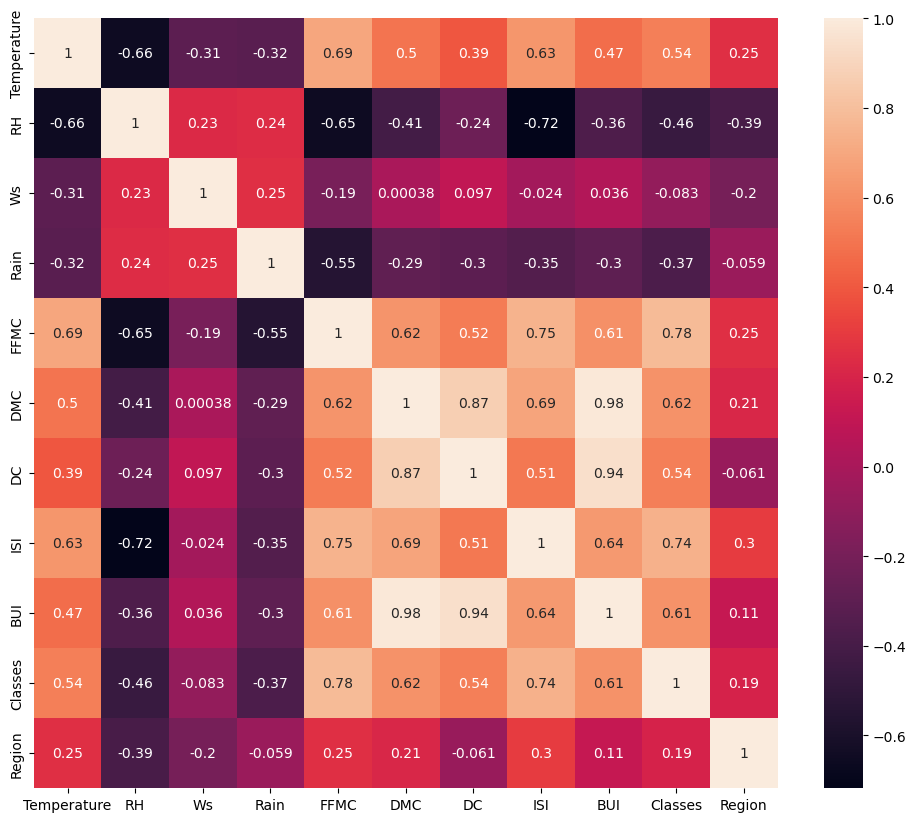

In [77]:
# checking the multicollinearity with heatmap

plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [78]:
# function to check if value is greater than threshold

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [79]:
corr_features = correlation(X_train, 0.85)

In [80]:
corr_features

{'BUI', 'DC'}

In [81]:
# droping the features when correlation is more than 0.85

X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

## Feature Scaling 

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/tmp/ipykernel_137/97594470.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


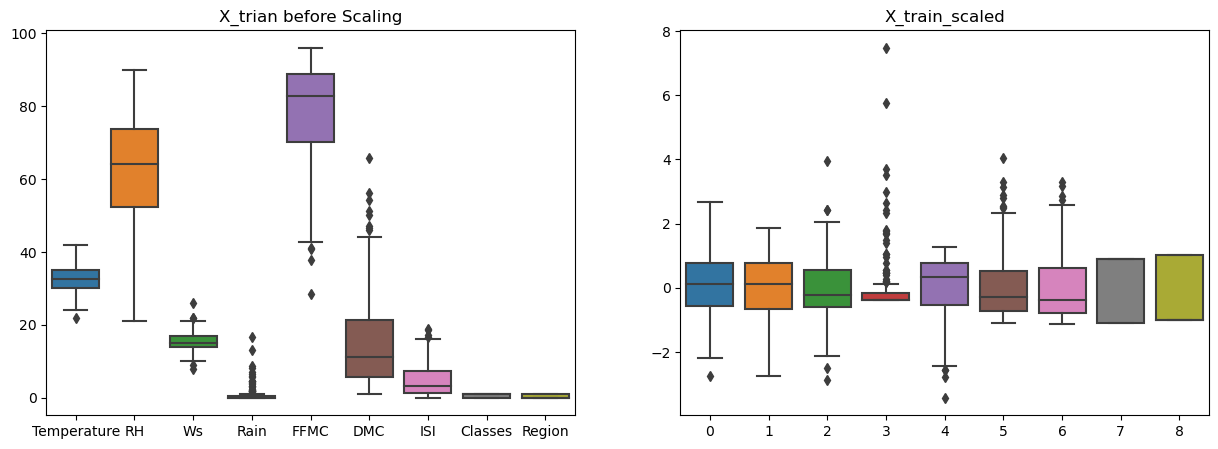

In [86]:
# Box plot to see the efferct of standard Scaler

plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_trian before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train_scaled')
plt.show()

## Linear Regression Model

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute error',mae)
print('R2_score',score)

Mean Absolute error 0.5468236465249985
R2_score 0.9847657384266951


## Lasso Regresssion

In [90]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute error',mae)
print('R2_score',score)

Mean Absolute error 1.133175994914409
R2_score 0.9492020263112388


## Ridge Regression Model

In [91]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute error',mae)
print('R2_score',score)

Mean Absolute error 0.5642305340105692
R2_score 0.9842993364555513


## Elasticnet Regression

In [92]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute error',mae)
print('R2_score',score)

Mean Absolute error 1.8822353634896005
R2_score 0.8753460589519703


## Pickling the model

In [95]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(regression,open('regressor.pkl','wb'))